# Excercise 2a: Exploratory Data Analysis

In [57]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

In [59]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

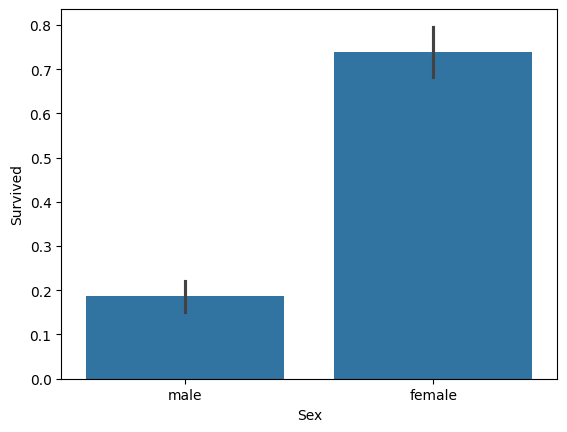

In [60]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes, first-class passengers had the highest survival rate, while third-class passengers had the lowest survival rate.

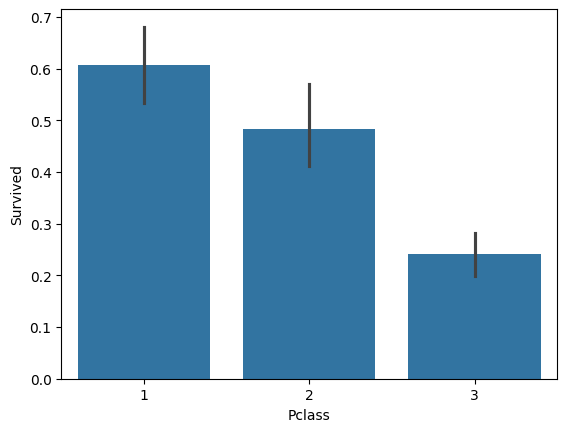

In [61]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x="Pclass", y="Survived", data=data)
plt.show()

# Question 2: Is survival related to Embarked?

Answer: Yes, passengers who embarked at Cherbourg (C) had the highest survival rate, while those who embarked at Southampton (S) had the lowest survival rate. Passengers who did not embark all survived, as expected.

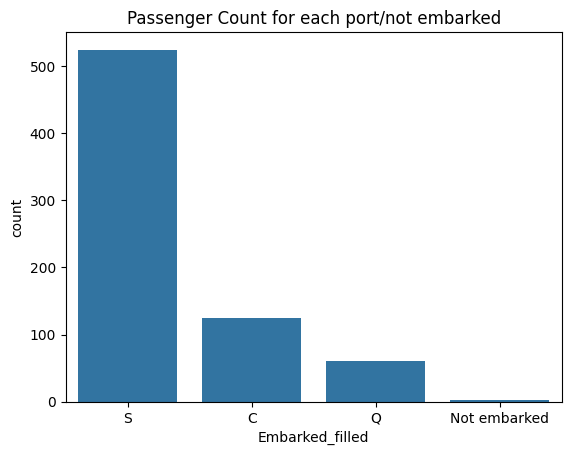

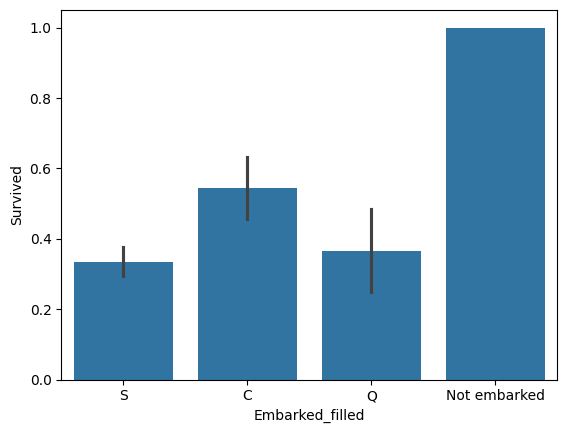

In [62]:
# Show the relevant statistics or visualization(s) to support your answer
data["Embarked_filled"] = data["Embarked"].fillna("Not embarked")

sns.countplot(x="Embarked_filled", data=data)
plt.title("Passenger Count for each port/not embarked")
plt.show()

sns.barplot(x="Embarked_filled", y="Survived", data=data)
plt.show()

# Question 3: How is age related to survival?

Answer: The children (0-12) had the highest survival rate, while young adults (19-30) had the lowest survival rate.

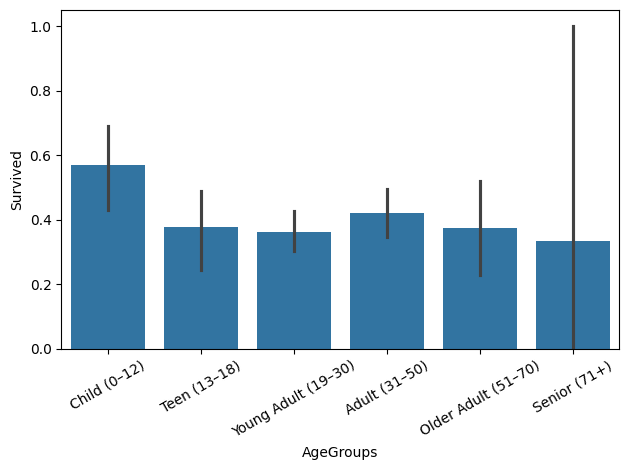

In [63]:
# Show the relevant statistics or visualization(s) to support your answer
bins   = [0, 12, 18, 30, 50, 70, 120]
labels = ["Child (0–12)", "Teen (13–18)", "Young Adult (19–30)","Adult (31–50)", "Older Adult (51–70)", "Senior (71+)"]
data["AgeGroups"] = pd.cut(data["Age"], bins=bins, labels=labels, include_lowest=True, ordered=True)
sns.barplot(x="AgeGroups", y="Survived", data=data, order=labels)
plt.xticks(rotation=30); plt.tight_layout(); plt.show()


# Question 4: Does family size somehow affect the survival rate?

Answer: Yes, passengers with a family size of 2 to 4 had a higher survival rate.

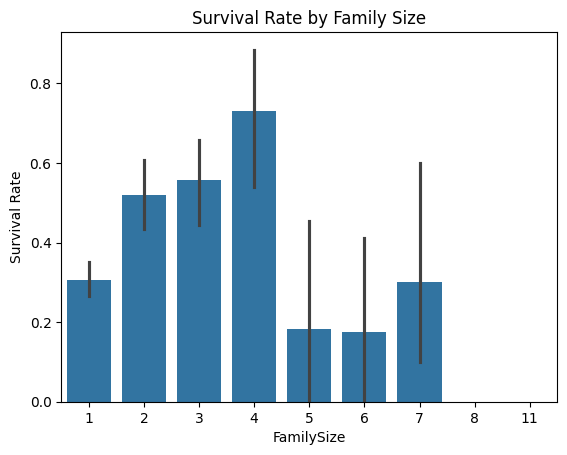

In [64]:
# Show the relevant statistics or visualization(s) to support your answer
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
ax = sns.barplot(x="FamilySize", y="Survived",data=data, estimator=lambda x: sum(x)/len(x))
ax.set_ylabel("Survival Rate")
ax.set_title("Survival Rate by Family Size")

plt.show()

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Yes, the title matters, with "Miss", "Mrs", and "Royalty" having the highest survival rates.

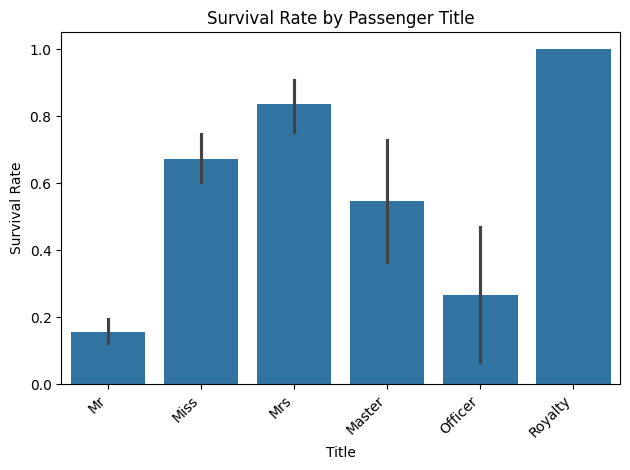

In [65]:
# Show the relevant statistics or visualization(s) to support your answer
data["Title"] = (data["Name"].str.extract(r",\s*([^\.]*)\s*\.", expand=False).str.strip())
present_titles = set(data["Title"].dropna().unique())

title_map = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Royalty", "the Countess": "Royalty",
    "Capt": "Officer", "Col": "Officer", "Major": "Officer",
    "Dr": "Officer", "Rev": "Officer"
}
data["Title"] = data["Title"].replace(title_map)

order_by_frequency = (data["Title"].value_counts(dropna=False).index.tolist())

ax = sns.barplot(x="Title", y="Survived",data=data,order=[t for t in order_by_frequency if pd.notna(t)])

ax.set_ylabel("Survival Rate")
ax.set_title("Survival Rate by Passenger Title")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()